### Simple Linear Regression

Steps to Build a Machine Learning Problem

    Big Data ? 
    
        core --> CPU
        
        out of core we don't have enough computing power to process data
        
        2 TB --> ML Train  ? 
        
        Distributed Computing 
        
            5GB -> ML Train -> 
            
            
            
            online --> live -> one by one directly from users ---> ML model 
            
            offline --> data warehoues --> (HDFS, GFS, S3, Data Lake)

#### Steps to Build a Machine Learning Model 


    1. Understanding Objective and gathering Domain knowledge
    2. Gather Data & Aggregate Data in Structure Format (Data Frame)
    3. Exploratory Data Analysis
    4. Data Preprocessing using Data Pipelines for machine learning model 
        Fixing Outliers 
        Fixing Missing Values
        Scaling Data
        Transforming non-numerical Data into numerical Data
        Feature Engineering - new features add using existing feature or drop some irrelvent features (feature selection)
    5. Select and Train Machine Learning Model
    6. Evaluation and Error Analaysis (Performance Measurement)
    7. Hyper-parameter Tunining to Improve Performance of ML model 
    8. Deployment (Lanuch), Monitoring, and Mantinance of ML model   
    
    

#### Simple Learning Regression 

    Regression 
    
        Predicting value of a continous linearly depended variable on the basis of indpendent variables 

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
mpg = sns.load_dataset("mpg").dropna()

In [3]:
mpg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
num_features = ["displacement", "horsepower", "weight", "acceleration"]

X = mpg[num_features]
y = mpg["mpg"]

Objective: 

    predict mileage mpg (y) of a car on the basis of displacement (X1),
    horsepower (X2), weight (X3), acceleration (X4)

In [5]:
X.head()

,displacement,horsepower,weight,acceleration
0,307.0,130.0,3504,12.0
1,350.0,165.0,3693,11.5
2,318.0,150.0,3436,11.0
3,304.0,150.0,3433,12.0
4,302.0,140.0,3449,10.5


In [6]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

    are these features relevent to predict mileage 
    
        EDA ? 

In [7]:
X.corrwith(y)

displacement   -0.805127
horsepower     -0.778427
weight         -0.832244
acceleration    0.423329
dtype: float64

In [13]:
np.corrcoef(mpg["horsepower"], mpg["horsepower"])[0, 1]

1.0

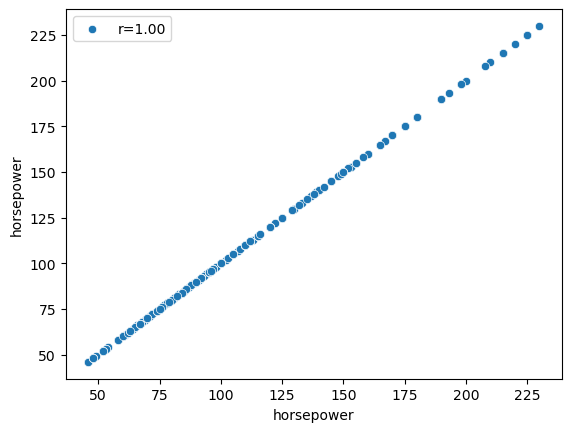

In [14]:
r = np.corrcoef(mpg["horsepower"], mpg["horsepower"])[0, 1]
sns.scatterplot(data=mpg, x="horsepower", y="horsepower", label=f"r={r:.2f}")
plt.legend()
plt.show()

-0.7784267838977759

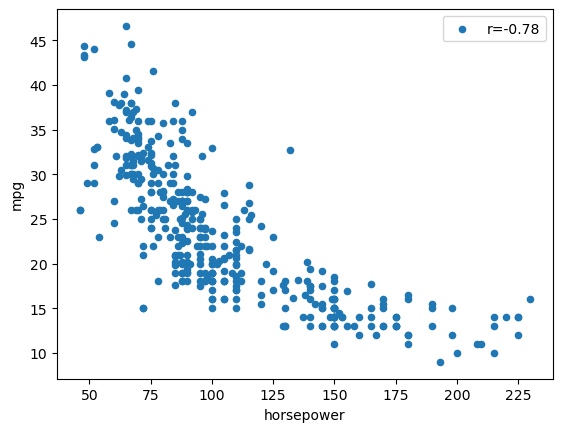

In [20]:
r = np.corrcoef(mpg["horsepower"], mpg["mpg"])[0, 1]
mpg.plot(kind="scatter",
        x="horsepower", 
        y="mpg", 
        label=f"r={r:.2f}")

plt.legend()
plt.show()

In [22]:
mpg.head(2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320


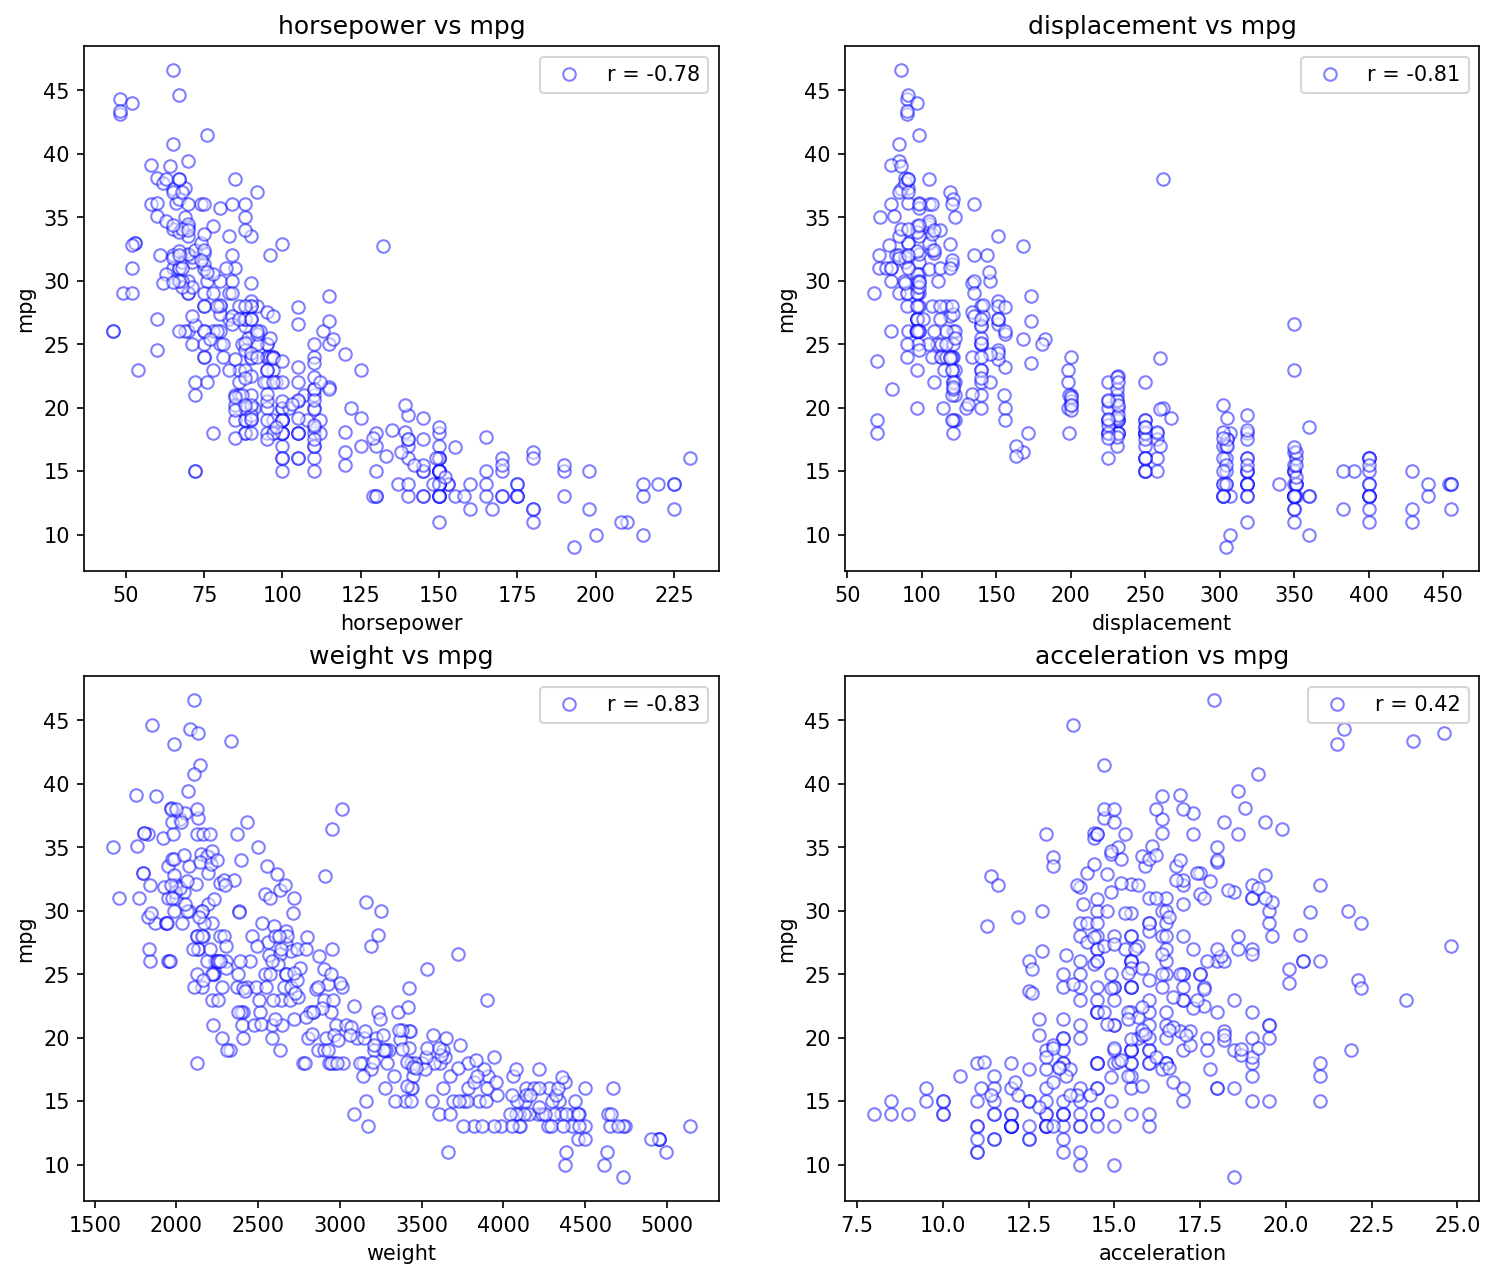

In [36]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, 
                                             figsize=(12, 10), dpi=150)

seq = zip(
    ["horsepower", "displacement", "weight", "acceleration"],
    [ax1,              ax2,            ax3,        ax4])

for column, ax in seq:
    r = np.corrcoef(mpg[column], mpg["mpg"])[0, 1]
    ax.plot(mpg[column], mpg["mpg"], "bo", label=f"r = {r:.2f}", mfc='white', alpha=0.5)
    ax.set_title(f"{column} vs mpg")
    ax.set_xlabel(column)
    ax.set_ylabel("mpg")
    ax.legend()

plt.show()

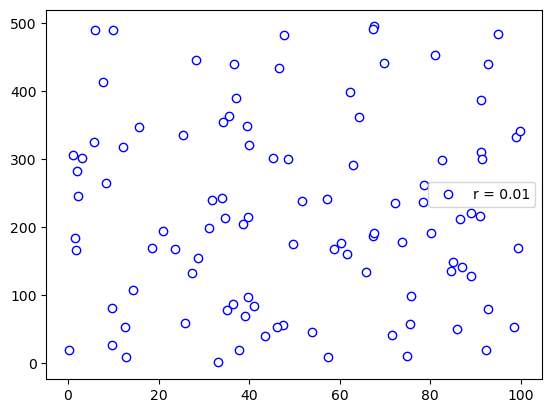

In [43]:
x = np.random.random(100)*100
y = np.random.random(100)*500
r = np.corrcoef(x, y)[0, 1]
plt.plot(x, y, 'bo', label=f"r = {r:0.2f}", mfc="w")
plt.legend()
plt.show()

In [78]:
np.random.seed(45)

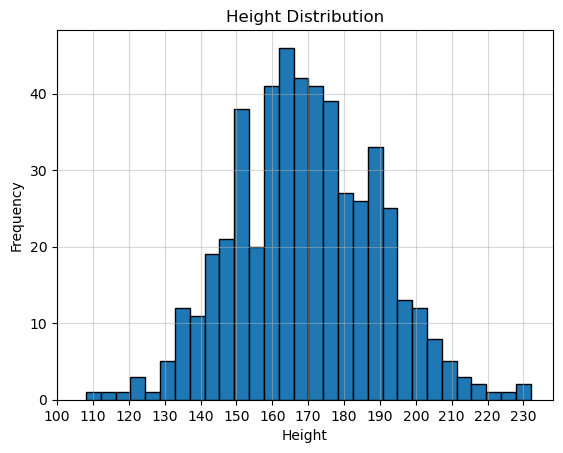

In [79]:
height = np.random.normal(170, 20, 500)
plt.hist(height, ec='k', bins=30)
plt.grid(alpha=0.5)
plt.title("Height Distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.xticks(np.arange(100, 240, 10))
plt.show()

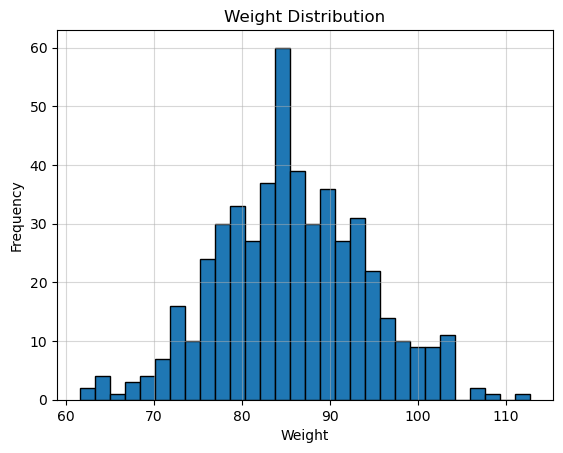

In [80]:
weight =  0.40 * height  + np.random.normal(18, 3, 500) 
plt.hist(weight, ec='k', bins=30)
plt.grid(alpha=0.5)
plt.title("Weight Distribution")
plt.xlabel("Weight")
plt.ylabel("Frequency")
#plt.xticks(np.arange(100, 240, 10))
plt.show()


In [81]:
r = np.corrcoef(height, weight)[0, 1]
print(r)

0.9351714001870048


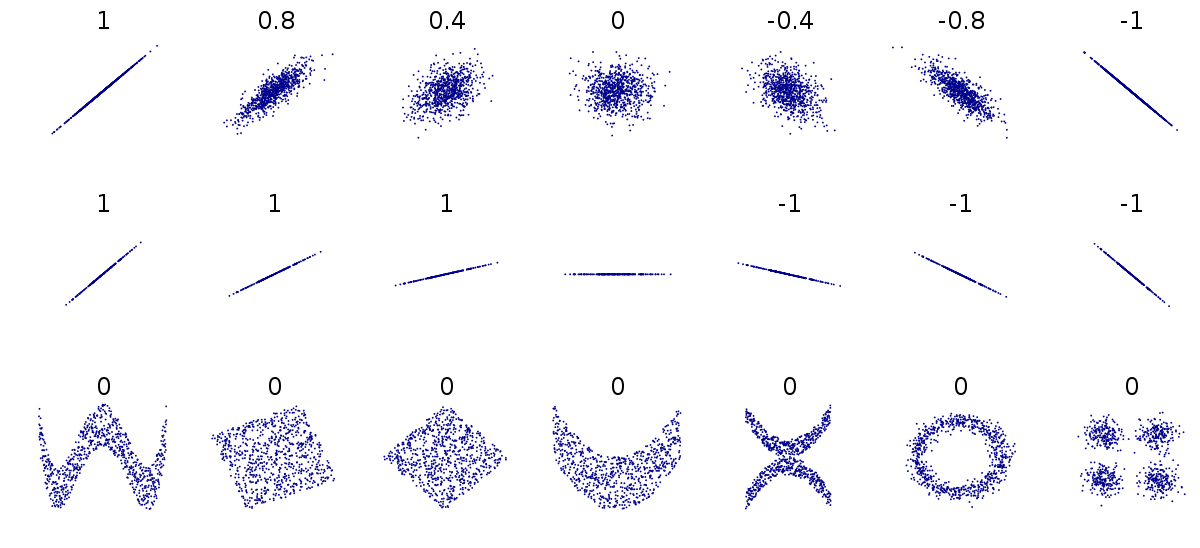

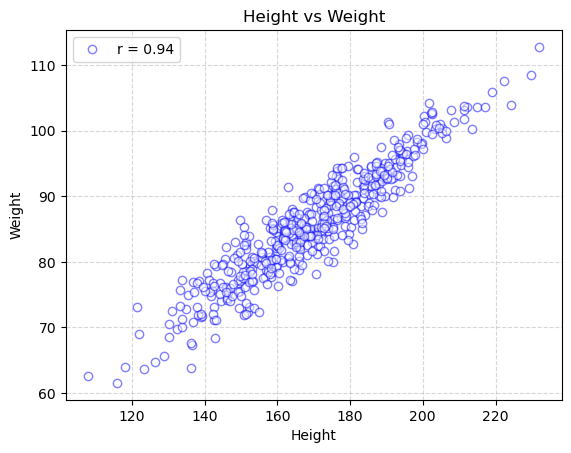

In [82]:
plt.plot(height, weight, "bo", mfc="w", alpha=0.5, label=f"r = {r:0.2f}")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.grid(alpha=0.5, ls='--')
plt.legend()
plt.show()

## Simple Linear Regression

    predicting a single dependent variable on the basis of single independent variable 
    
    1 feature and 1 target than it's SLR
    
    we want to predict weight using height 

In [83]:
# self generated linearly depdent data to understand simple linear regression
height = np.random.normal(170, 20, 500)
weight =  0.40 * height  + np.random.normal(18, 3, 500)

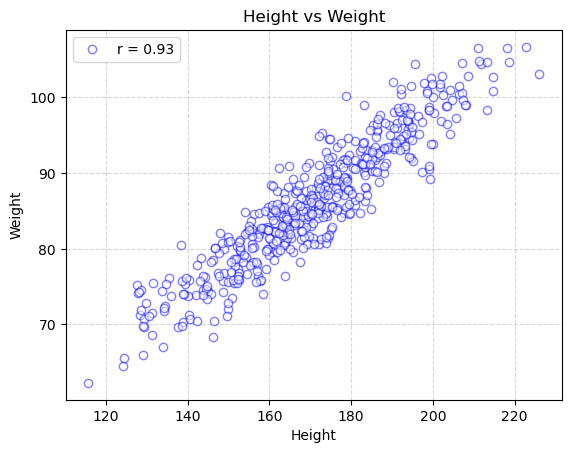

In [84]:
r = np.corrcoef(height, weight)[0, 1]
plt.plot(height, weight, "bo", mfc="w", alpha=0.5, label=f"r = {r:0.2f}")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.grid(alpha=0.5, ls='--')
plt.legend()
plt.show()

    what do you understand by learning in machine learning ?
    
                    or
                    
    what do you mean fitting training data ? or what does fit function do in machine learning ?

    Learning or Fitting is process by which we find best value for hypothesis / prediction functions parameters using training data

For Each ML Model


    1. Hypothesis Function / Prediction Function 

    2. Cost Function / Error Function 

    3. Evaluation Metrices / Performance Measurement

    4. Hyper parameters Tunning

## Linear Regression


#### Hypothisis Function / Prediction 

$\hat y = \theta_0 + \theta_1 X_1 + \theta_2 X_2 + ... + \theta_n X_n$

$\hat y$ = estimated value of y

$\theta$ = parameters of equation

$X_i$ = input features on the basis of which we are estimating y using parameters


$\hat { \text {weight} } = \theta_0 + \theta_1 *  \text {height}$

#### Cost Function 

    mean squared error
    
$\text {mse} = \frac {\sum { (\hat y_i - y_i) }^2 } {N}$

#### Learning or fitting 

    Finding the best value of parameters (Theta) such it minimizes Cost Function (MSE)
    
    to find this we need to derivate cost with respect to parameters and find the minimum value of parameters using training data

$\theta = {(X^TX)}^{-1}X^Ty$ vector format

$$\theta_1 =  \frac { \sum (\bar y - y^{(i)}) (\bar X_1 - {X_1}^{(i)}) } { \sum {(\bar X_1 - {X_1}^{(i)})}^2 } $$

$$\theta_0 =\bar y -  \theta_1 \bar X_1 $$

In [93]:
y = weight
X1 = height

In [102]:
theta_1 =  ( (y.mean() - y)*(X1.mean() - X1) ).sum() / ( ( X1.mean() - X1)**2 ).sum()
theta_0 =  y.mean() - theta_1 * X1.mean()

print("Coef_ / Slope = ", theta_1)
print("Intercept = ", theta_0)

y_hat = theta_0 + theta_1 * X1

Coef_ / Slope =  0.3985035922305554
Intercept =  18.229241955019333


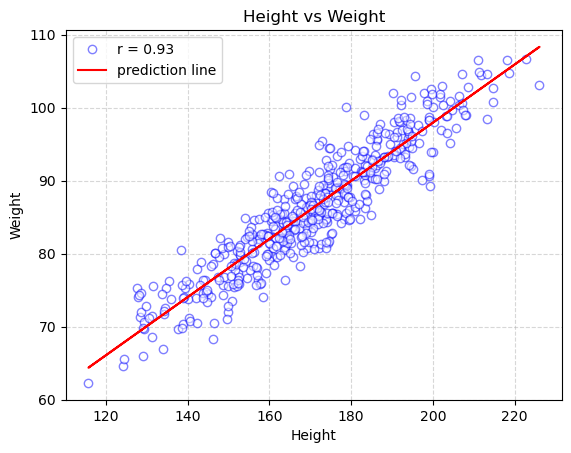

In [103]:
r = np.corrcoef(height, weight)[0, 1]
plt.plot(height, weight, "bo", mfc="w", alpha=0.5, label=f"r = {r:0.2f}")
plt.plot(height, y_hat, "r-", label="prediction line")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.grid(alpha=0.5, ls='--')
plt.legend()
plt.show()

    tips on the basis of total bill in tips datasets
    
    
    using simple linear regression from scratch 